In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

Starting hyperparameter tuning on Idun


In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "tabGAN-qtr"
hp_info = fetch_hp_info(method=METHOD_NAME)

In [5]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, **kwargs):
    curr_image_dir = os.path.join(const.dir.images_hp_v2(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v2(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        subfolder=METHOD_NAME,
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"],
        save_dir = const.dir.images_hp_v2(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/60 [00:00<?, ?it/s]

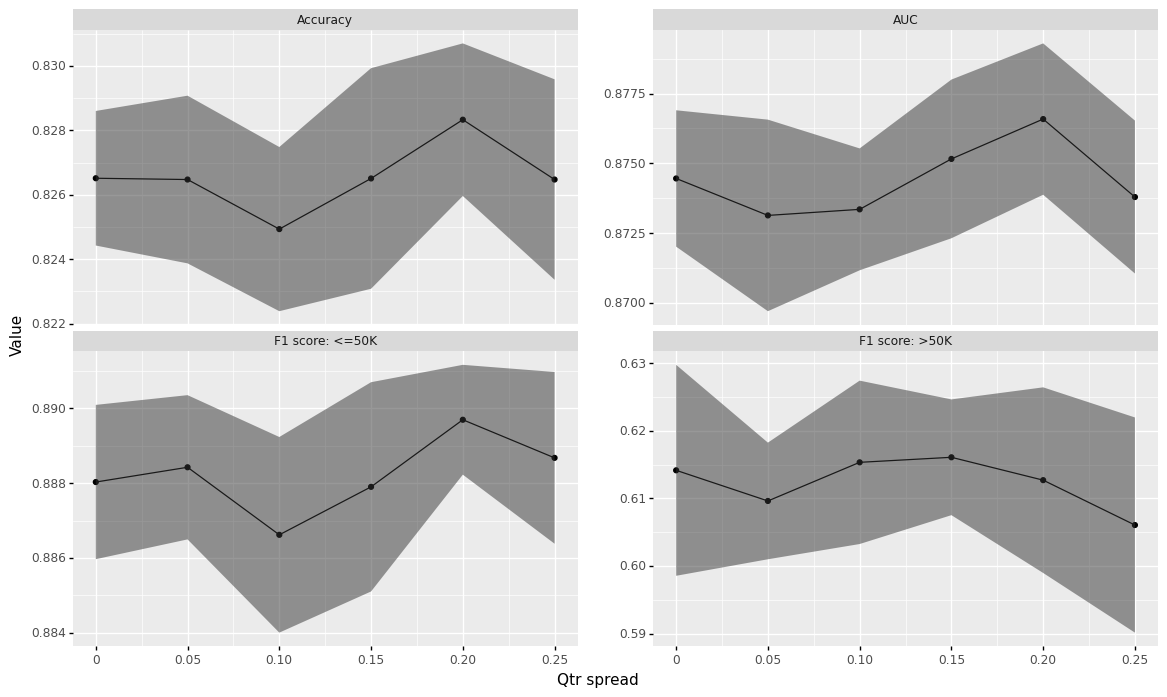

In [34]:
result_qtr_spread = helpers.plot_hp_tuning("qtr_spread")

In [35]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.826514,0.874459,0.751096,0.888031,0.614162,0.002091,0.002442,0.007323,0.002064,0.015597
1,0.05,0.826474,0.873135,0.749028,0.888426,0.609631,0.002605,0.003430,0.004552,0.001929,0.008623
2,0.10,0.824934,0.873352,0.750980,0.886619,0.615342,0.002551,0.002183,0.005403,0.002617,0.012080
3,0.15,0.826507,0.875159,0.751995,0.887902,0.616087,0.003427,0.002842,0.004475,0.002799,0.008557
4,0.20,0.828333,0.876586,0.751202,0.889697,0.612706,0.002371,0.002710,0.007006,0.001469,0.013724
5,0.25,0.826474,0.873793,0.747374,0.888678,0.606070,0.003114,0.002739,0.007975,0.002297,0.015908
